## Task1 

Step 1: Prioritize Tags for Translation:
Frequency-Based Selection: Prioritize tags based on their 'Count' column, i.e., tags that appear most frequently across articles should be translated first. This ensures that the most common tags are accurately translated.

Step 2: Translation:
Human Translation: Utilize human translators for high-priority tags, as they can ensure accuracy and context.
Machine Translation: For the remaining tags, employ machine translation services like Google Cloud Translation API. This would be efficient for bulk translation.

Step 3: Create Translated Dictionary in BigQuery:
Table Structure: Enhance the dictionary table to have additional columns: English_Translation and Original_Language.
Bulk Upload: Once translations are ready, use batch operations to upload the translated tags to BigQuery, ensuring efficient data transfer and minimal API costs.

Step 4: Maintenance:
Automate New Tags: Set up a system to identify and translate new tags as they are added to the dictionary. This ensures the translated dictionary remains up-to-date.
2. SQL Query for Creating the Data Mart
Let's assume the tables are named articles and dictionary. Here's the SQL to create the required data mart:

In [ ]:
'''WITH JoinedData AS (
    SELECT
        a.Article_id,
        a.Article_name,
        d.Tag_id,
        d.English_Translation AS Tag_name
    FROM
        articles a, UNNEST(a.Tag_ids) AS t(Tag_id)
    LEFT JOIN dictionary d ON t.Tag_id = d.Tag_id
)

SELECT 
    Article_id,
    Article_name,
    ARRAY_AGG(Tag_name) AS Tag_names
FROM
    JoinedData
GROUP BY
    Article_id,
    Article_name;'''

Explanation:
The SQL begins with a Common Table Expression (WITH clause) that joins the articles table with the dictionary table on Tag_id, while unnesting the Tag_ids array from the articles table.

The main query then aggregates the results to group by Article_id and Article_name, and it uses ARRAY_AGG to collect all the associated tag names into an array for each article.

With this approach and SQL, you will have a data mart in BigQuery that can be efficiently queried for analytics and reporting in Looker or other BI tools.

## Task 2

When aiming to consolidate ad data from multiple platforms (Twitter, Meta, and LinkedIn) into a Looker dashboard, consider the following approach and dataflow schema optimized for cost and time efficiency:

1. Data Sources and Extraction:
Twitter Ads API: Use the Twitter Ads API to extract metrics like impressions, clicks, conversion rates, and spend.

Meta Ads (formerly Facebook Ads) API: Use the Meta Ads API to pull similar metrics as Twitter.

LinkedIn Marketing Solutions API: Use this to gather data from LinkedIn ad campaigns.

2. Data Storage:
Cloud Storage: Initially, store the extracted raw data into a cloud storage solution like Google Cloud Storage, AWS S3, or Azure Blob Storage. This acts as a staging area, ensuring that the raw data is always available if needed.

BigQuery: Use a cloud-based database solution like BigQuery for data transformation and querying due to its seamless integration with Looker and cost-effective storage and querying capabilities.

3. Data Transformation & ETL:
ETL Tools: Use tools like Apache Airflow, dbt, or even Looker's native capabilities to perform ETL tasks. This involves:
Extraction: Pull data from the respective APIs.
Transformation: Standardize metric names, data types, and structures across all platforms. For instance, rename metrics so they're consistent across sources (e.g., "views" in one platform should match "impressions" in another if they mean the same thing). Handle any currency conversions, deduplication, or other data cleaning tasks.
Loading: Load the transformed data into BigQuery.
4. Data Analysis:
BigQuery SQL: Use SQL to create aggregated tables/views that will be used to power the Looker dashboard. This reduces the complexity of LookML models and ensures efficient querying.
5. Dashboard Creation in Looker:
LookML Models: Create a LookML model based on the BigQuery views/tables.

Visualization: Design the dashboard in Looker using tiles, charts, and other visualization elements to present data clearly and allow for easy comparison between platforms.

6. Automation & Refresh:
Schedule Data Refreshes: Automate data extraction using the ETL tools so the Looker dashboard remains up-to-date. Depending on business needs, you could refresh multiple times a day or daily.

Alerts: Implement alerts for anomalies in ad performance or discrepancies in data.

7. Cost Optimization:
Query Optimization: Regularly optimize BigQuery queries to ensure they run efficiently, reducing costs.

Data Retention: Implement data retention policies. Store detailed granular data only for a limited time and keep aggregated data for longer periods.

8. Security & Compliance:
Ensure that data storage and transmission are compliant with data protection regulations (e.g., GDPR, CCPA). Implement proper access controls in both BigQuery and Looker.
Dataflow Schema:
Twitter, Meta, LinkedIn (Data Sources)
→ Extract using APIs
→ Store in Cloud Storage (Staging Area).

Cloud Storage
→ ETL Processes (Transform & Clean Data)
→ Load into BigQuery.

BigQuery
→ Query & Aggregate
→ Use in Looker for visualization.

By following this approach and schema, you ensure a smooth, cost-effective, and timely flow of data from the ad platforms to the Looker dashboard, allowing stakeholders to make informed decisions based on the latest data.

## Task 3

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
# Load data from the Excel file
sales_data = pd.read_excel("/Users/olgakoneva/Documents/test_task_beincrypto.xlsx")
sales_data.head()


,id,property_hs_analytics_source,property_hs_latest_source,property_hs_lead_status,property_lifecyclestage,property_source,property_total_revenue,property_hs_time_between_contact_creation_and_deal_close,property_hs_time_to_move_from_lead_to_customer
0,1,OFFLINE,OFFLINE,Qualified,customer,NaN,900.0,1.684435e+10,2.138725e+09
1,2,OFFLINE,OFFLINE,Sales Captured Lead,opportunity,NaN,0.0,NaN,NaN
2,3,EMAIL_MARKETING,OFFLINE,Customer,customer,NaN,300.0,3.901640e+10,2.138718e+09
3,4,OFFLINE,OFFLINE,Retention,customer,NaN,225.0,5.711067e+10,2.138711e+09
4,5,OFFLINE,DIRECT_TRAFFIC,Customer,customer,NaN,720.0,5.683087e+10,2.138713e+09


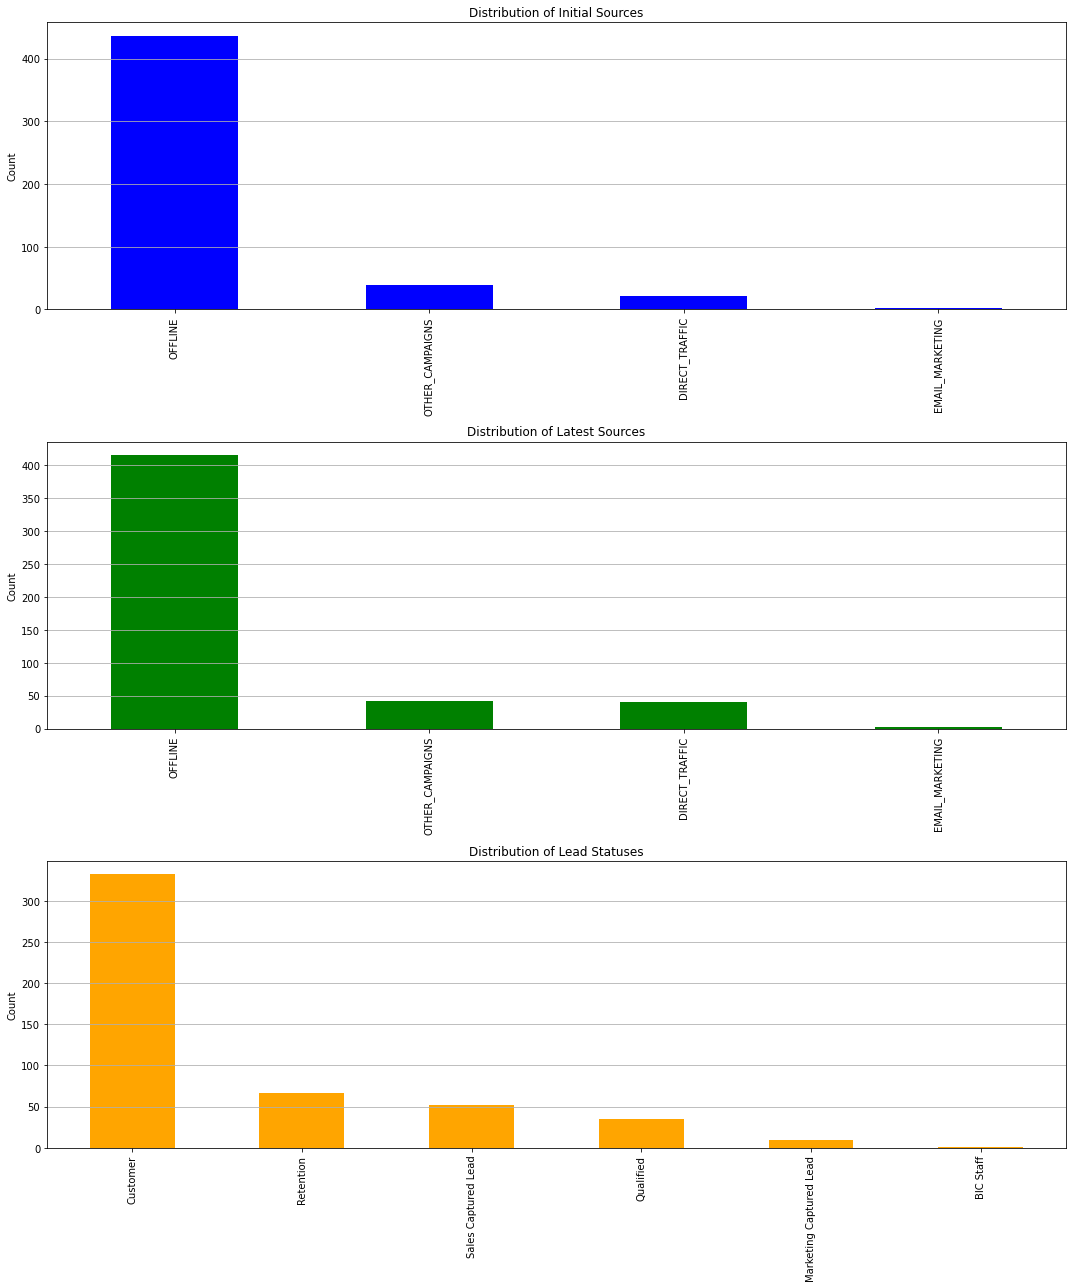

In [9]:
# Set up the plotting space
fig, ax = plt.subplots(3, 1, figsize=(15, 18))

# Distribution of the initial source of the lead/sale
sales_data['property_hs_analytics_source'].value_counts().plot(kind='bar', ax=ax[0], color='blue')
ax[0].set_title('Distribution of Initial Sources')
ax[0].set_ylabel('Count')
ax[0].grid(axis='y')

# Distribution of the latest source of the lead/sale
sales_data['property_hs_latest_source'].value_counts().plot(kind='bar', ax=ax[1], color='green')
ax[1].set_title('Distribution of Latest Sources')
ax[1].set_ylabel('Count')
ax[1].grid(axis='y')

# Distribution of lead statuses
sales_data['property_hs_lead_status'].value_counts().plot(kind='bar', ax=ax[2], color='orange')
ax[2].set_title('Distribution of Lead Statuses')
ax[2].set_ylabel('Count')
ax[2].grid(axis='y')

plt.tight_layout()
plt.show()

The visualizations provide us with the following insights:

Distribution of Initial Sources:
Most leads initially come from the "OFFLINE" source, followed by "EMAIL_MARKETING" and other sources.
Distribution of Latest Sources:
"OFFLINE" continues to be a dominant source even in the latest interactions with the leads.
"DIRECT_TRAFFIC" and "EMAIL_MARKETING" are also significant contributors.
Distribution of Lead Statuses:
A significant portion of leads has been converted to "Customers".
A smaller portion is in the "Retention" stage or labeled as "Qualified". There's also a section that falls under "Sales Captured Lead".
Proposed Actions:
Focus on Effective Channels:

Given that a significant portion of leads and customers come from offline sources, it might be beneficial to understand what offline strategies are currently employed and how they can be optimized further.
Email Marketing:

Email marketing seems to be an effective strategy for acquiring leads. Consider optimizing email campaigns, segmenting the audience, and personalizing content to enhance conversion rates.
Lead Conversion:

There's a segment labeled as "Qualified" and "Sales Captured Lead". It would be essential to have targeted campaigns or strategies to push these leads down the funnel and convert them into customers.
Retention Strategies:

For those in the "Retention" stage, consider loyalty programs, feedback loops, and personalized offers to ensure they remain engaged and continue to make purchases.
Next, let's analyze the distribution of lifecycle stages and the total revenue distribution.

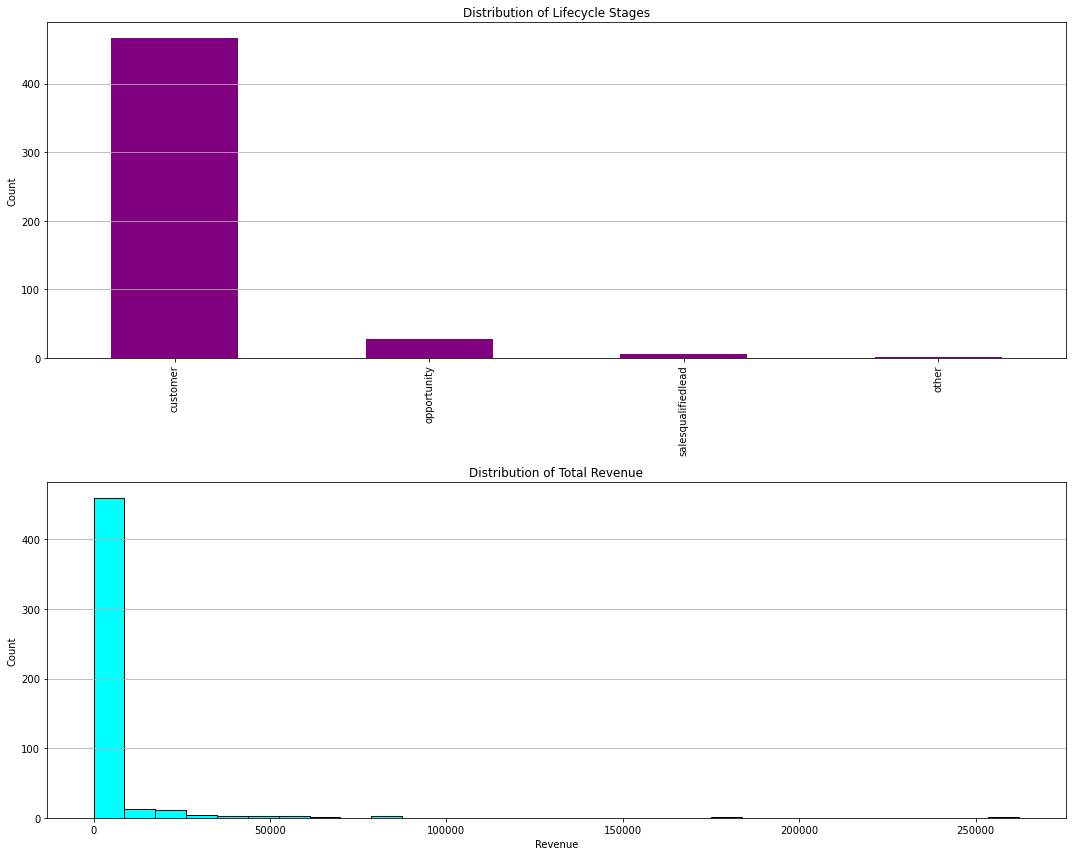

In [11]:
# Set up the plotting space
fig, ax = plt.subplots(2, 1, figsize=(15, 12))

# Distribution of lifecycle stages
sales_data['property_lifecyclestage'].value_counts().plot(kind='bar', ax=ax[0], color='purple')
ax[0].set_title('Distribution of Lifecycle Stages')
ax[0].set_ylabel('Count')
ax[0].grid(axis='y')

# Total revenue distribution
sales_data['property_total_revenue'].plot(kind='hist', bins=30, ax=ax[1], color='cyan', edgecolor='black')
ax[1].set_title('Distribution of Total Revenue')
ax[1].set_xlabel('Revenue')
ax[1].set_ylabel('Count')
ax[1].grid(axis='y')

plt.tight_layout()
plt.show()
#Here's a deeper dive into the visualizations:

Distribution of Lifecycle Stages:

A vast majority of entries are in the "customer" lifecycle stage. This indicates a high conversion rate from leads to customers.
A smaller portion is in the "opportunity" stage, suggesting these are potential leads that could be converted with the right strategies.
Distribution of Total Revenue:

The revenue distribution is right-skewed, indicating that a large number of sales generate a smaller amount of revenue, while a few sales generate significantly higher revenue.
This could suggest the presence of a few high-value products or deals that contribute significantly to the revenue.
Insights & Proposed Actions:
Lifecycle Analysis:

The high number of customers compared to opportunities suggests effective conversion strategies. However, it's crucial to continue nurturing the "opportunity" segment to maintain or improve the conversion rate.
Revenue Analysis:

Since most sales seem to be clustered in the lower revenue bracket, it might be worthwhile to identify and promote products or services that have a higher profit margin or are more popular among customers.
For those sales that generate higher revenue, understanding the customer profile or the product/service involved can offer insights into how to replicate such high-revenue sales.
Upselling & Cross-Selling:

Given the distribution of revenue, there might be opportunities for upselling or cross-selling to customers in the lower revenue bracket. By offering complementary products or premium versions, there's potential to increase the average transaction value.
Overall, the data provides insights into customer acquisition sources, the effectiveness of conversion strategies, and revenue distribution. Continual analysis of such metrics, combined with A/B testing or other optimization strategies, can help refine marketing and sales efforts for better results.



